In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [55]:
# Load the dataset
df = pd.read_csv("data/creditcard_2023.csv")


In [56]:
# Selected features
features = ["V10", "V4", "V14", "V12", "V11", "V17", "V16", "V7", "V3", "V2"]

# Features data
X = df[features]

# Target variable
y = df['Class']


In [57]:


# Splitting the dataset into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# Creating the KNN model

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

Confusion Matrix:
 [[56670   193]
 [    0 56863]]
Accuracy: 0.9983029386419991
Precision: 0.9966173583847449
Recall: 1.0
F1 Score: 0.9983058137799665
AUC-ROC: 0.9993316102288587


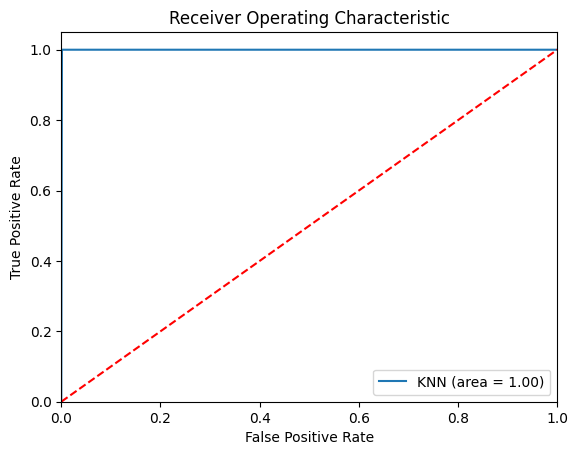

In [59]:

# Predicting the Test set results
y_pred = knn.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# ROC-AUC
y_probs = knn.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class
auc = roc_auc_score(y_test, y_probs)
print("AUC-ROC:", auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


The results for the KNN model are quite impressive and suggest that the model is performing exceptionally well on this dataset. Below is a breakdown of the metrics and some additional considerations:

### Breakdown of Metrics

- **Confusion Matrix**: The confusion matrix shows that there are 56,670 true negatives and 56,863 true positives, with only 193 false positives and 0 false negatives. This indicates that the model is very effective at identifying both classes, particularly excellent at catching all positive (fraudulent) cases without missing any (zero false negatives).
- **Accuracy**: An accuracy of 99.83% is extremely high, indicating that the model correctly predicts the outcome for almost all of the instances.
- **Precision**: At 99.66%, the precision is very high, meaning that when the model predicts an instance as positive, it is correct almost all the time.
- **Recall**: A recall of 100% is perfect, indicating that the model successfully identified all actual positive cases in the dataset.
- **F1 Score**: An F1 score of 99.83% is outstanding and suggests a superb balance between precision and recall.
- **AUC-ROC**: The AUC-ROC score of 99.93% is also excellent, demonstrating that the model has a high degree of separability between the classes.

### Additional Considerations

- **Model Robustness**: Given the high scores across all metrics, the model appears to be very robust. However, it's important to consider if there's any overfitting. Since the results are almost perfect, ensuring that the training and testing sets are properly randomized is essential, and that no data leakage has occurred.




## Learning Curves
Learning curves plot the model's performance on the training and validation sets over varying numbers of training samples. They help diagnose whether the learning process is benefiting from more data, which stabilizes performance and can indicate overfitting when the training and validation scores diverge.

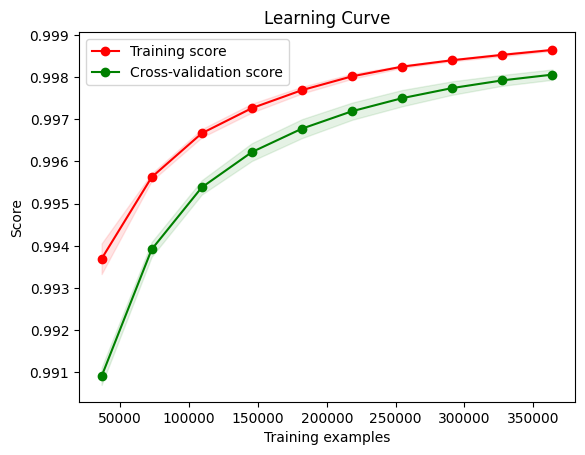

In [60]:
from sklearn.model_selection import learning_curve
# Setup for learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    knn,  # the model
    X_train_scaled,  # feature matrix
    y_train,  # response vector, make sure this matches the scaled features in size
    cv=5,  # number of folds in cross-validation
    n_jobs=-1,  # use all computer cores
    train_sizes=np.linspace(0.1, 1.0, 10)  # 10 evenly spaced relative intervals for training set sizes
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


The learning curve  shows thst the model  is performing very well. The high scores for both training and cross-validation suggest that the model is generalizing well to unseen data. 